Question 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation

Load data

In [ ]:
import numpy as np
import sklearn
import math
num_train=1300
x=np.arange(0,2*math.pi,math.pi/1000)
y=np.sin(x)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)

print('Train data shape: {}'.format(x_train.shape))
print('Test  data shape: {}'.format(x_test.shape))

Train data shape: (1600,)
Test  data shape: (400,)


In [ ]:
from keras.layers import Dropout

In [ ]:
model = Sequential()  # a sequence of layers
# First hidden Layer
model.add(Dense(input_dim=1,units=300,kernel_initializer='normal'))
model.add(Activation(activation='relu'))
# Second hidden Layer
model.add(Dense(units=150,kernel_initializer='normal'))
model.add(Activation(activation='relu'))
# Output Layer
model.add(Dense(1, activation='linear'))

In [ ]:
from tensorflow import keras
from keras import optimizers
model.compile(
    loss='mse',
    optimizer = keras.optimizers.Adam(learning_rate=0.001, decay=1e-6,beta_1=0.9, beta_2=0.999),
    metrics=['mse']
)

In [ ]:
history=model.fit(x_train[:num_train], y_train[:num_train],
          batch_size=32,
          epochs=40,
          validation_data=(x_train[num_train:], y_train[num_train:]))

Epoch 1/40
41/41 [==============================] - 1s 8ms/step - loss: 0.3856 - mse: 0.3856 - val_loss: 0.2594 - val_mse: 0.2594
Epoch 2/40
41/41 [==============================] - 0s 4ms/step - loss: 0.2011 - mse: 0.2011 - val_loss: 0.1403 - val_mse: 0.1403
Epoch 3/40
41/41 [==============================] - 0s 4ms/step - loss: 0.1471 - mse: 0.1471 - val_loss: 0.1267 - val_mse: 0.1267
Epoch 4/40
41/41 [==============================] - 0s 4ms/step - loss: 0.1381 - mse: 0.1381 - val_loss: 0.1191 - val_mse: 0.1191
Epoch 5/40
41/41 [==============================] - 0s 4ms/step - loss: 0.1352 - mse: 0.1352 - val_loss: 0.1132 - val_mse: 0.1132
Epoch 6/40
41/41 [==============================] - 0s 5ms/step - loss: 0.1213 - mse: 0.1213 - val_loss: 0.1008 - val_mse: 0.1008
Epoch 7/40
41/41 [==============================] - 0s 4ms/step - loss: 0.1134 - mse: 0.1134 - val_loss: 0.1110 - val_mse: 0.1110
Epoch 8/40
41/41 [==============================] - 0s 4ms/step - loss: 0.1116 - mse: 0.11

In [ ]:
model.save('sine-predict.h5')

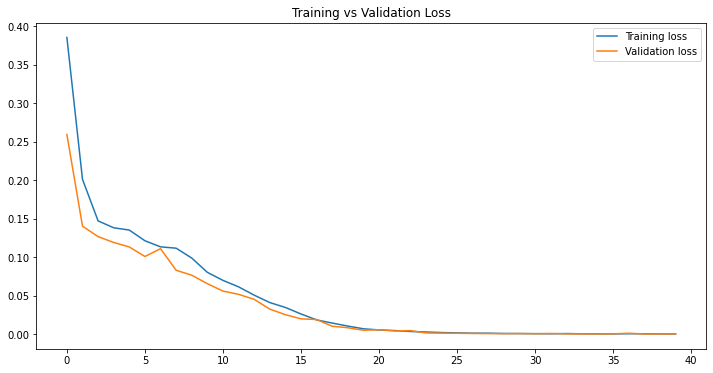

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

In [ ]:
model.evaluate(x_test, y_test, batch_size=32)

13/13 [==============================] - 0s 2ms/step - loss: 2.8403e-04 - mse: 2.8403e-04


[0.00028402815223671496, 0.00028402815223671496]

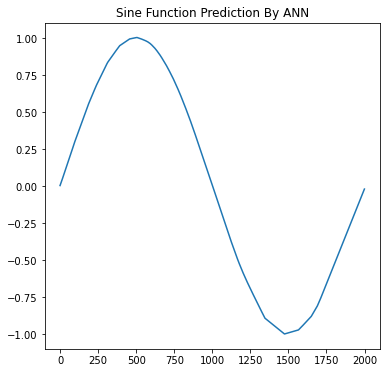

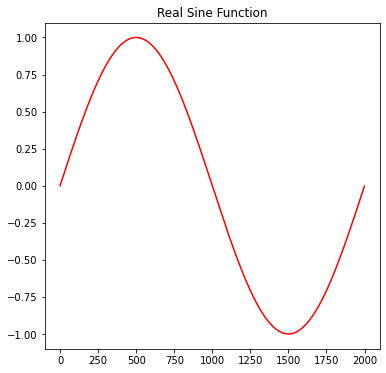

In [ ]:
x=np.arange(0,(2*math.pi),math.pi/1000)
h=model.predict(x)
plt.figure(figsize=(6, 6))
plt.plot(h)
plt.title("Sine Function Prediction By ANN");
plt.figure(figsize=(6, 6))
y=np.sin(x)
plt.plot(y,'r')
plt.title("Real Sine Function");